In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='dataset.csv'
df=pd.read_csv(path)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

DATA VISUALIZATION AND EXPLORATION

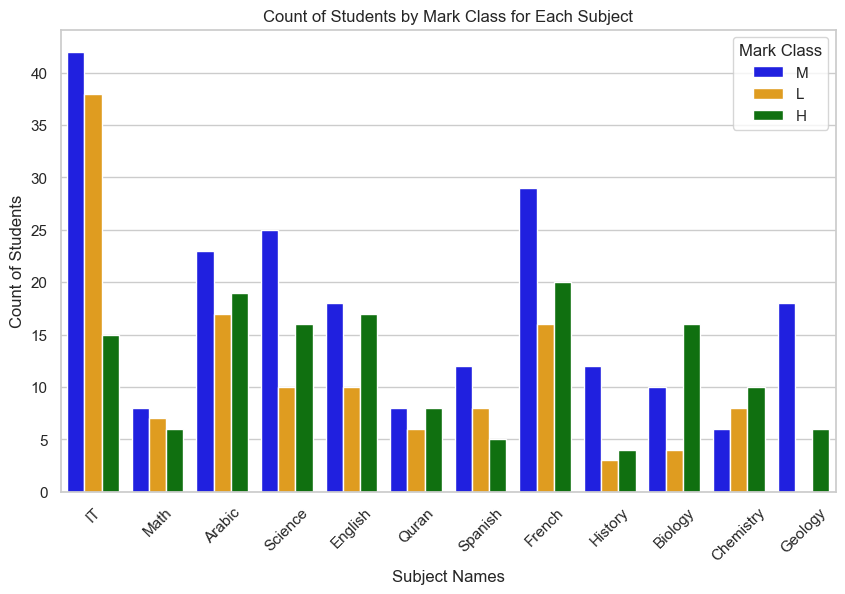

In [4]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6))  

sns.countplot(x='Topic', hue='Class', data=df, palette={'M': 'blue', 'L': 'orange', 'H': 'green'})


plt.xlabel('Subject Names')
plt.ylabel('Count of Students')
plt.title('Count of Students by Mark Class for Each Subject')
plt.legend(title='Mark Class', loc='upper right')


plt.xticks(rotation=45) 
plt.show()


We can see how IT has very low high_grade student ratio out of total students taking IT.So we can conclude IT is the hardest to excel at.

Biolog,Chemistry has the highest high_marks student ratio which means most students generally find easy to score good in biology,Chemistry.

Geology doesn't have any low grade student.

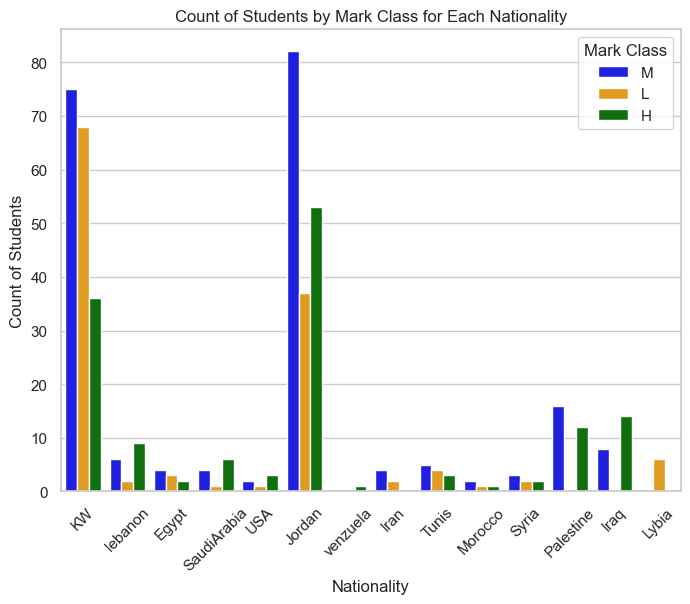

In [5]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  
sns.countplot(x='NationalITy', hue='Class', data=df, palette={'M': 'blue', 'L': 'orange', 'H': 'green'})


plt.xlabel('Nationality')
plt.ylabel('Count of Students')
plt.title('Count of Students by Mark Class for Each Nationality')
plt.legend(title='Mark Class', loc='upper right')


plt.xticks(rotation=45)  
plt.show()

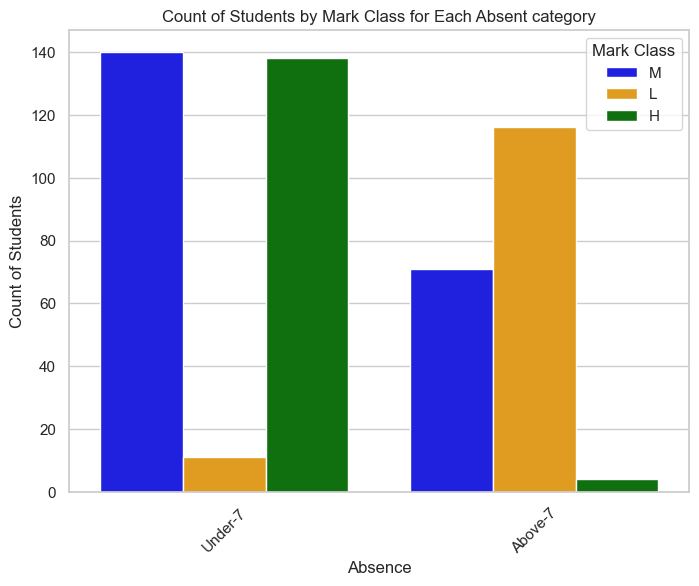

In [6]:
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6)) 

sns.countplot(x='StudentAbsenceDays', hue='Class', data=df, palette={'M': 'blue', 'L': 'orange', 'H': 'green'})


plt.xlabel('Absence')
plt.ylabel('Count of Students')
plt.title('Count of Students by Mark Class for Each Absent category')
plt.legend(title='Mark Class', loc='upper right')


plt.xticks(rotation=45) 
plt.show()

#as we can see the no. of absent days is directly related to amarks as students with above 7 absent days have high no. of Low grade students and vice-versa.

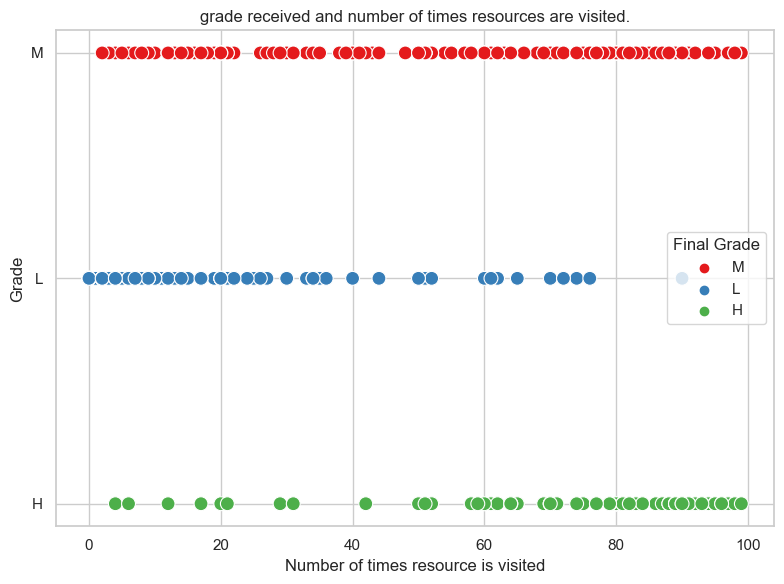

In [31]:
plt.figure(figsize=(8, 6))  


sns.set(style="whitegrid")


sns.scatterplot(x='VisITedResources', y='Class', hue='Class', data=df, palette='Set1', s=100)


plt.xlabel('Number of times resource is visited')
plt.ylabel('Grade')
plt.title('grade received and number of times resources are visited.')

plt.legend(title='Final Grade')


plt.tight_layout()
plt.show()

As you can see there are no students who fall in LOW category if they atleast visited resoruces 80 times. Establishing a relationship between them.

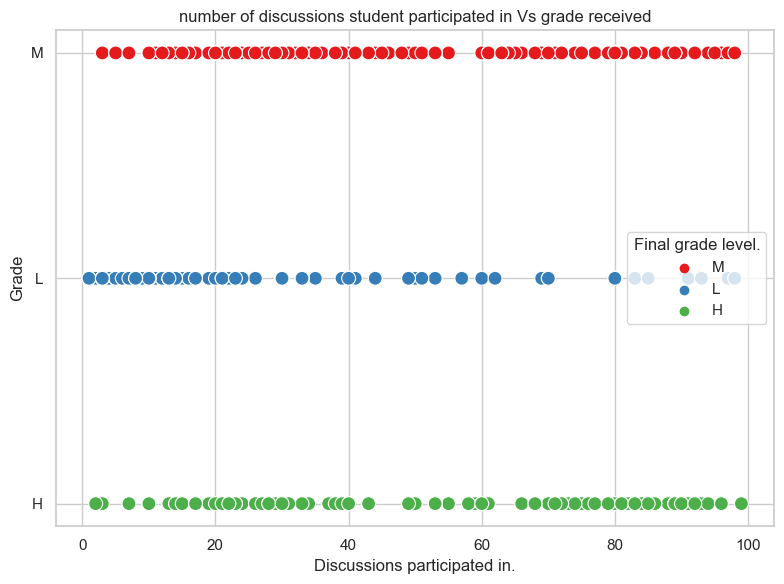

In [32]:
plt.figure(figsize=(8, 6))  


sns.set(style="whitegrid")


sns.scatterplot(x='Discussion', y='Class', hue='Class', data=df, palette='Set1', s=100)


plt.xlabel('Discussions participated in.')
plt.ylabel('Grade')
plt.title('number of discussions student participated in Vs grade received')


plt.legend(title='Final grade level.')

# Show the plot
plt.tight_layout()
plt.show()

From the graph, we can tell that there are high chances student won't be in the low category if his discussions are high. 

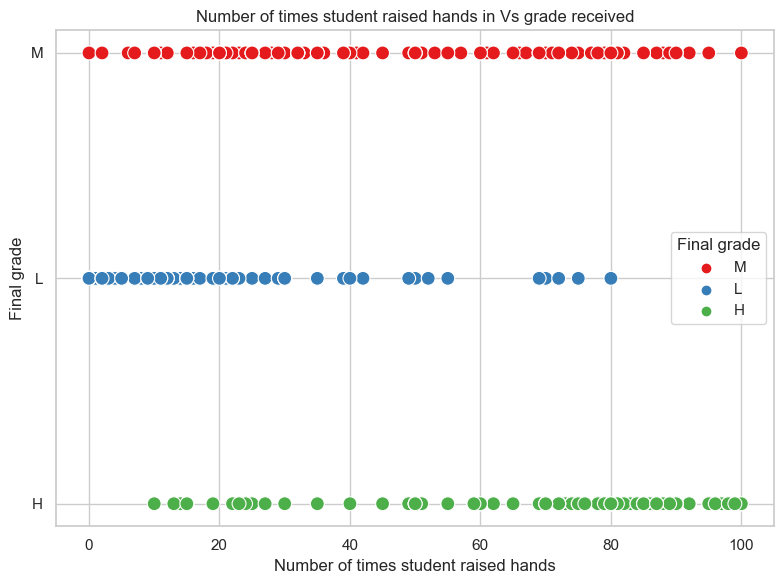

In [33]:
plt.figure(figsize=(8, 6)) 


sns.set(style="whitegrid")


sns.scatterplot(x='raisedhands', y='Class', hue='Class', data=df, palette='Set1', s=100)


plt.xlabel('Number of times student raised hands')
plt.ylabel('Final grade')
plt.title('Number of times student raised hands in Vs grade received')

plt.legend(title='Final grade')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
ratios = df.groupby(['NationalITy', 'Class']).size().unstack(fill_value=0)
ratios['L_ratio'] = ratios['L'] / (ratios['M'] + ratios['L'] + ratios['H'])

sorted_ratios = ratios.sort_values(by='L_ratio', ascending=False)

print(sorted_ratios)

Class         H   L   M   L_ratio
NationalITy                      
Lybia         0   6   0  1.000000
KW           36  68  75  0.379888
Egypt         2   3   4  0.333333
Iran          0   2   4  0.333333
Tunis         3   4   5  0.333333
Syria         2   2   3  0.285714
Morocco       1   1   2  0.250000
Jordan       53  37  82  0.215116
USA           3   1   2  0.166667
lebanon       9   2   6  0.117647
SaudiArabia   6   1   4  0.090909
Iraq         14   0   8  0.000000
Palestine    12   0  16  0.000000
venzuela      1   0   0  0.000000


Students from Lybia and KW have the highest low_grade ratio.

In [11]:
ratios['H_ratio'] = ratios['H'] / (ratios['M'] + ratios['L'] + ratios['H'])

# Sort countries by L_ratio in descending order and find the second highest
sorted_ratios_H = ratios.sort_values(by='H_ratio', ascending=False)

print(sorted_ratios_H)

Class         H   L   M   L_ratio   H_ratio
NationalITy                                
venzuela      1   0   0  0.000000  1.000000
Iraq         14   0   8  0.000000  0.636364
SaudiArabia   6   1   4  0.090909  0.545455
lebanon       9   2   6  0.117647  0.529412
USA           3   1   2  0.166667  0.500000
Palestine    12   0  16  0.000000  0.428571
Jordan       53  37  82  0.215116  0.308140
Syria         2   2   3  0.285714  0.285714
Morocco       1   1   2  0.250000  0.250000
Tunis         3   4   5  0.333333  0.250000
Egypt         2   3   4  0.333333  0.222222
KW           36  68  75  0.379888  0.201117
Iran          0   2   4  0.333333  0.000000
Lybia         0   6   0  1.000000  0.000000


Students from Venezuela,Iraq and Saudi have the most high_grade student ratio.

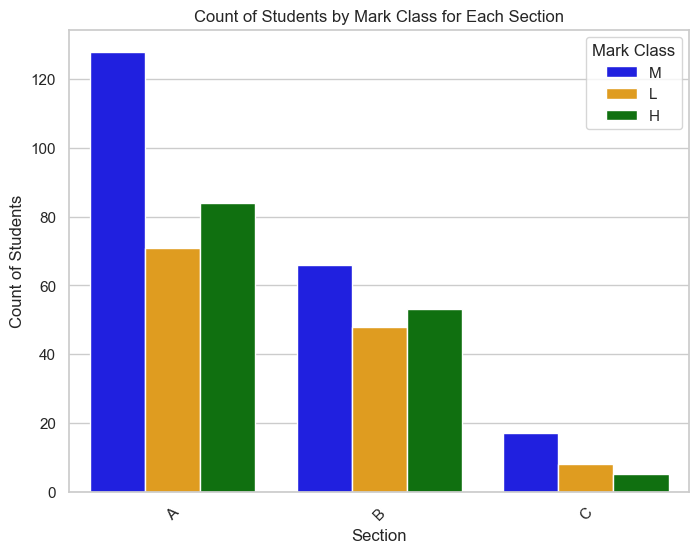

In [12]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  

sns.countplot(x='SectionID', hue='Class', data=df, palette={'M': 'blue', 'L': 'orange', 'H': 'green'})


plt.xlabel('Section')
plt.ylabel('Count of Students')
plt.title('Count of Students by Mark Class for Each Section')
plt.legend(title='Mark Class', loc='upper right')


plt.xticks(rotation=45)  
plt.show()

In [13]:
ratios_section = df.groupby(['SectionID', 'Class']).size().unstack(fill_value=0)
ratios_section['L_ratio'] = ratios_section['L'] / (ratios_section['M'] + ratios_section['L'] + ratios_section['H'])

sorted_ratios_section_L = ratios_section.sort_values(by='L_ratio', ascending=False)

print(sorted_ratios_section_L)

Class       H   L    M   L_ratio
SectionID                       
B          53  48   66  0.287425
C           5   8   17  0.266667
A          84  71  128  0.250883


We can't really infer anything because all the ratios are closely similar.

In [14]:
melt = pd.melt(df,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView'])
melt

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1435,L,AnnouncementsView,5
1436,M,AnnouncementsView,14
1437,M,AnnouncementsView,25
1438,L,AnnouncementsView,14


Text(0.5, 1.0, 'High, middle and low level students')

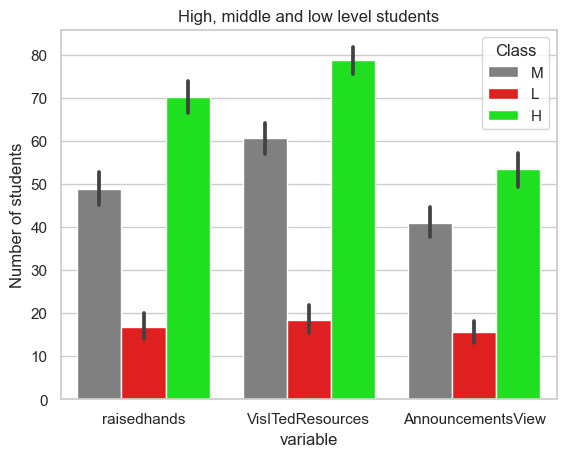

In [34]:
sns.barplot(x='variable',y='value',hue='Class' , data=melt,palette={'H':'lime','M':'grey','L':'red'})
plt.ylabel('Number of students')
plt.title('High, middle and low level students')

In [16]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


In [17]:
pd.crosstab(df['Class'],df['gender'])

gender,F,M
Class,,
H,75,67
L,24,103
M,76,135


In [18]:
crosstab = pd.crosstab(index=df['Class'], columns=[df['gender'], df['Topic']])
crosstab

gender      F                                                                  \
Topic  Arabic Biology Chemistry English French Geology History  IT Math Quran   
Class                                                                           
H           7       6         8      11     12       4       1   7    2     5   
L           4       2         4       2      0       0       2   7    0     1   
M           5       2         0       6     18       6       5  18    3     3   

gender  ...         M                                                        \
Topic   ... Chemistry English French Geology History  IT Math Quran Science   
Class   ...                                                                   
H       ...         2       6      8       2       3   8    4     3       4   
L       ...         4       8     16       0       1  31    7     5       8   
M       ...         6      12     11      12       7  24    5     5      16   

gender          
Topic  Spanish  
Class           
H            5  
L            8  
M           11  

[3 rows x 24 columns]

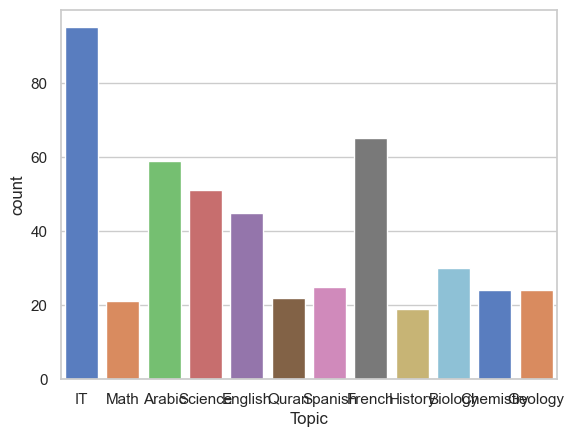

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
#breakdown by class
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

##FROM THIS WE CAN CONCLUDE THAT MATH,QURAN AND HISTORY ARE THE SUBJECTS STUDENT STRUGGLE WITH THE MOST. WHEREAS IT,FRENCH AND ARABIC ARE WHERE STUDENTS EXCEL THE MOST##

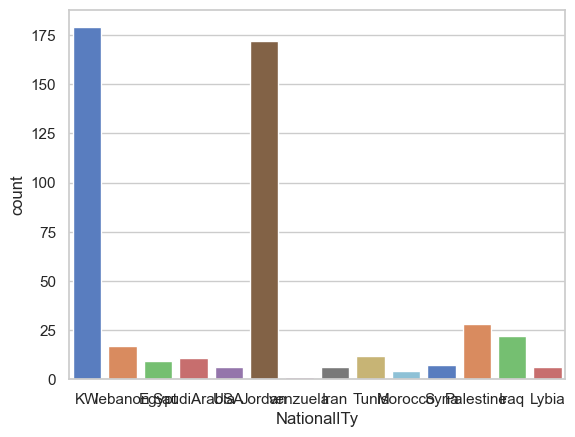

In [20]:
sns.countplot(x="NationalITy", data=df, palette="muted");
plt.show()

In [21]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [22]:
mapping_dict = {'G-01': 1, 'G-02': 2, 'G-03': 3, 'G-04': 4, 'G-05': 5, 'G-06': 6, 'G-07': 7, 'G-08': 8, 'G-09': 9, 'G-10': 10, 'G-11': 11, 'G-12': 12}


df['GradeID'] = df['GradeID'].map(mapping_dict)

In [23]:
map_dict_section={'A':0,'B':1,'C':2}
df['SectionID']=df['SectionID'].map(map_dict_section)
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,4,0,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,4,0,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,4,0,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,4,0,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,4,0,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,8,0,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,8,0,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,8,0,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,8,0,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [24]:
df.drop(columns=['SectionID'],inplace=True)

In [25]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,4,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,4,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,4,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,4,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,4,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,8,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,8,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,8,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,8,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [26]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Topic', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
label_encoders = {}

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le




In [27]:
label_encoders

{'Topic': LabelEncoder(),
 'ParentAnsweringSurvey': LabelEncoder(),
 'ParentschoolSatisfaction': LabelEncoder(),
 'StudentAbsenceDays': LabelEncoder()}

In [28]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,4,7,F,Father,15,16,2,20,1,1,1,M
1,M,KW,KuwaIT,lowerlevel,4,7,F,Father,20,20,3,25,1,1,1,M
2,M,KW,KuwaIT,lowerlevel,4,7,F,Father,10,7,0,30,0,0,0,L
3,M,KW,KuwaIT,lowerlevel,4,7,F,Father,30,25,5,35,0,0,0,L
4,M,KW,KuwaIT,lowerlevel,4,7,F,Father,40,50,12,50,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,8,2,S,Father,5,4,5,8,0,0,0,L
476,F,Jordan,Jordan,MiddleSchool,8,5,F,Father,50,77,14,28,0,0,1,M
477,F,Jordan,Jordan,MiddleSchool,8,5,S,Father,55,74,25,29,0,0,1,M
478,F,Jordan,Jordan,MiddleSchool,8,6,F,Father,30,17,14,57,0,0,0,L
